# **Test Set 1 Random Data**

---



In [369]:
#Import statements
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [370]:
df = pd.read_csv("/home/Time by Occupancy.csv")
df.head()

,Value1,Occupancy1,Value2,Occupancy2
0,1,0.25,1,0.09
1,2,0.55,2,0.10
2,3,0.09,3,0.06
3,4,0.90,4,0.20
4,5,0.24,5,0.45


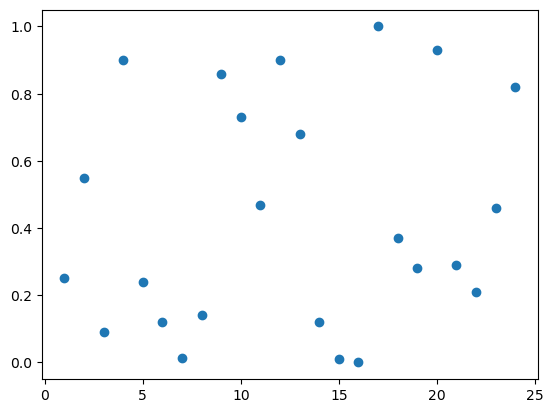

In [371]:
#Distribution 1
X = df['Value1']
Y = df['Occupancy1']

plt.scatter(X,Y)

# **Test Set 2 - Practical Distribution**

---



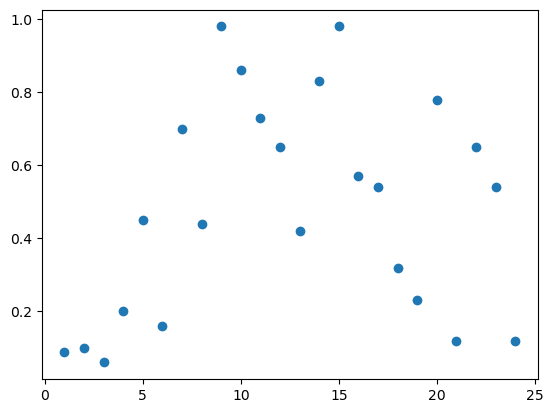

In [372]:
#Distribution 2
x = df['Value2']
y = df['Occupancy2']

plt.scatter(x,y)


# K-Means Clustering: 5 Clusters

In [373]:
km = KMeans(n_clusters = 5)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [374]:
y_predicted = km.fit_predict(df[['Value2', 'Occupancy2']])

y_predicted

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0], dtype=int32)

Text(0, 0.5, 'Occupancy')

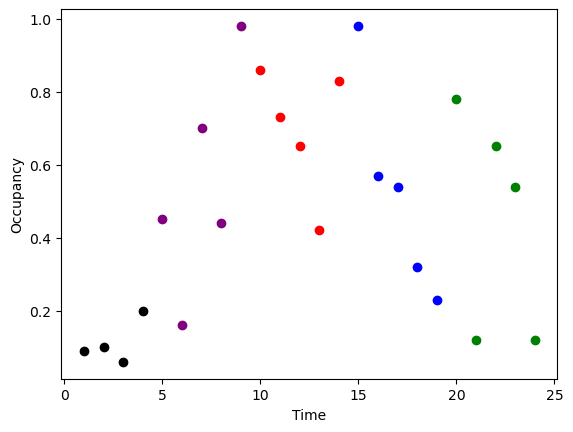

In [375]:
#Testing kmeans with 5 clusters
df['cluster'] = y_predicted

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.scatter(df1['Value2'], df1['Occupancy2'], color = 'green')
plt.scatter(df2['Value2'], df2['Occupancy2'], color = 'red')
plt.scatter(df3['Value2'], df3['Occupancy2'], color = 'black')
plt.scatter(df4['Value2'], df4['Occupancy2'], color = 'purple')
plt.scatter(df5['Value2'], df5['Occupancy2'], color = 'blue')

plt.xlabel('Time')
plt.ylabel('Occupancy')

#Results were mid

# K-Means Clustering: Elbow Method

Let's figure out the k-means using the elbow method instead...

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

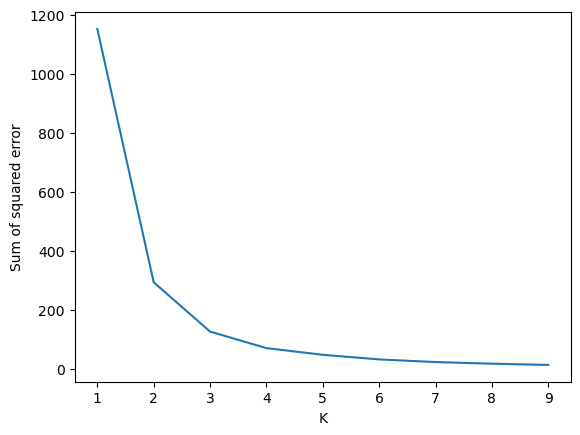

In [376]:
k_rng = range(1,10)

sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Value2', 'Occupancy2']])
    sse.append(km.inertia_)

#plotting k
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)


K value may be 3 - 4, 5 starts diminishing returns

# K-Means Clustering: 4 Clusters

In [377]:
km2 = KMeans(n_clusters = 4)
km2.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [378]:
y_predicted2 = km2.fit_predict(df[['Value2', 'Occupancy2']])

y_predicted2

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [379]:
km2.cluster_centers_

array([[15.5       ,  0.61      ],
       [ 3.5       ,  0.17666667],
       [21.5       ,  0.40666667],
       [ 9.5       ,  0.72666667]])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

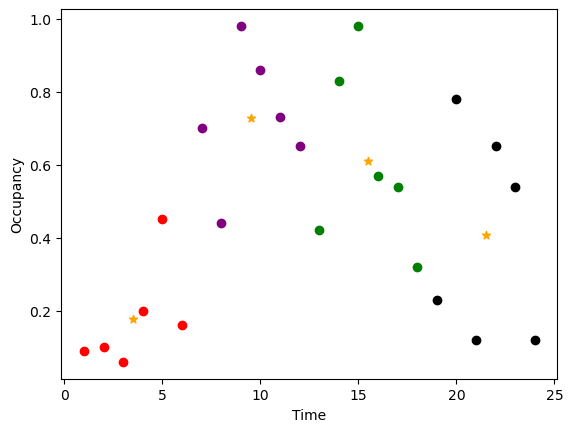

In [380]:
df['cluster2'] = y_predicted2

df1 = df[df.cluster2 == 0]
df2 = df[df.cluster2 == 1]
df3 = df[df.cluster2 == 2]
df4 = df[df.cluster2 == 3]
#df5 = df[df.cluster == 4]

plt.scatter(df1['Value2'], df1['Occupancy2'], color = 'green')
plt.scatter(df2['Value2'], df2['Occupancy2'], color = 'red')
plt.scatter(df3['Value2'], df3['Occupancy2'], color = 'black')
plt.scatter(df4['Value2'], df4['Occupancy2'], color = 'purple')
#plt.scatter(df5['Value2'], df5['Occupancy2'], color = 'blue')

plt.xlabel('Time')
plt.ylabel('Occupancy')

plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='orange',marker='*',label='centroid')

plt.legend

Question: Does this actually.. work? We want numerical values to return so they may be passed into the algorithm, but k-means is for grouping data.. don't we need a regression model..

        But this data is parabolic... what about a different library?

# **Linear Models - Gaussian Process Regression**

---



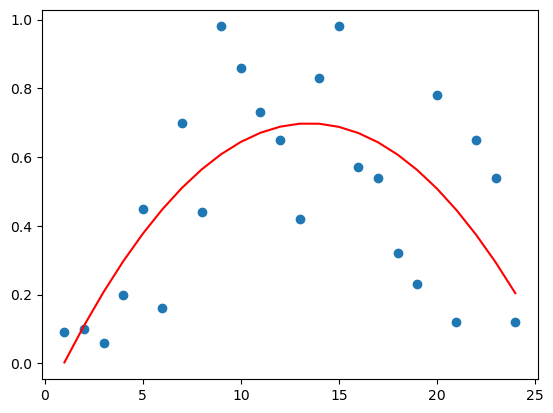

In [381]:
#Gaussian Process Regression

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Place the list values into arrays
X_array = np.array(df['Value2'])
X_array = X_array.reshape(-1, 1)

Y_array = np.array(df['Occupancy2'])
Y_array = Y_array.reshape(-1, 1)

poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly.fit_transform(X_array)
poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, df['Occupancy2'])
y_predicted_regress = poly_reg_model.predict(poly_features)

y_predicted_regress

plt.scatter(x,y)
plt.plot(x, y_predicted_regress, c = "red")
plt.show()

In [382]:
#Now to calculate the standard deviation of the residuals
#this will be the noise
coefficients = np.polyfit(x, y, 2)
a = coefficients[0]
b = coefficients[1]
c = coefficients[2]

residuals = y - (a * x + b * x + c)

std_deviation = np.std(residuals)
std_deviation

0.7950394517857113

In [383]:
from sklearn.gaussian_process.kernels import RationalQuadratic, ConstantKernel as C
from sklearn.preprocessing import StandardScaler

#assign them to training sets
X_train = X_array
y_train = Y_array

#Scales the x input array - I don't know how to use it effectively, though
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

#Hm.. the issue with this kernel type is that it's for unrelated data
#noise_kernel = std_deviation ** 1 * RBF(length_scale = 1.0) + WhiteKernel(
#    noise_level = std_deviation ** 1, noise_level_bounds = (1e-5, 1e5)
#)

#Initialize kernels
noise_kernel = C(1.0, (1e-3, 1e3)) * RationalQuadratic(length_scale = 0.001, alpha = std_deviation)
kernel = 1.0**1 * RBF(length_scale = 1.0, length_scale_bounds = (1e-2, 1e2))

#Train the model
final_kernel = (kernel + noise_kernel)

gaussian_process = GaussianProcessRegressor(kernel = final_kernel, alpha = 0.1, n_restarts_optimizer = 10, normalize_y=False)

#This function only takes 2D arrays as input, hence the
#reshape method call earlier - it takes 1D arrays and...
#...does... *something* to make it work

gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

0.338**2 * RBF(length_scale=9.47) + 0.266**2 * RationalQuadratic(alpha=4.81e+04, length_scale=9.47)

Text(0, 0.5, 'Occupancy2')

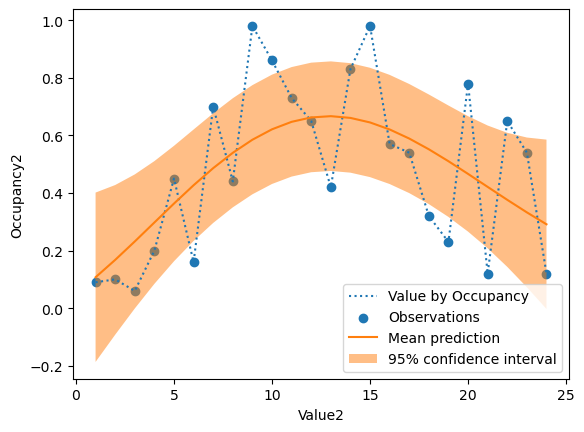

In [384]:
mean_prediction, std_prediction = gaussian_process.predict(X_array, return_std = True)

plt.plot(X_array, Y_array, label = r"Value by Occupancy", linestyle = "dotted")
plt.scatter(X_train, y_train, label = "Observations")
plt.plot(X_array, mean_prediction, label = "Mean prediction")
plt.fill_between(
    X_array.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)

plt.legend()
plt.xlabel("Value2")
plt.ylabel("Occupancy2")


# Testing Predictions on Randomly Generated Data

In [385]:
#Testing Predictions on randomly generated dataset
df_test = pd.read_csv('/home/Time by Occupancy Testing Set CSV.csv')
df_test.head()

,ValueA,ValueB,ValueC,ValueD
0,1,0.279511,0.714029,0.047652
1,2,0.629529,0.112538,0.112107
2,3,0.095081,0.418279,0.993778
3,4,0.484936,0.478635,0.998816
4,5,0.458817,0.689867,0.124780


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


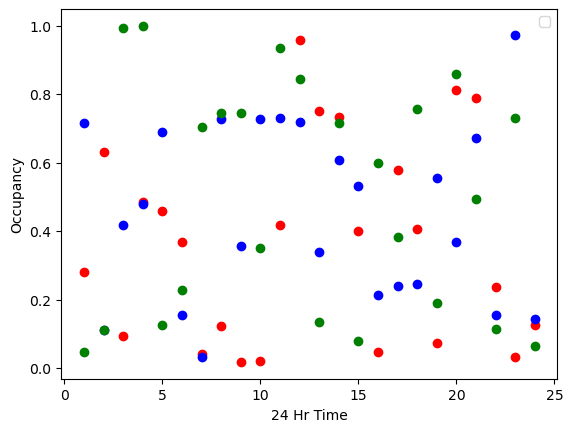

In [386]:
#Visualizing test set data

X_test_set = df_test['ValueA']

temp_col1 = df_test['ValueB']
temp_col2 = df_test['ValueC']
temp_col3 = df_test['ValueD']

y_test_set = pd.concat([temp_col1, temp_col2, temp_col3], axis = 1)

plt.scatter(X_test_set, temp_col1, color = 'red')
plt.scatter(X_test_set, temp_col2, color = 'blue')
plt.scatter(X_test_set, temp_col3, color = 'green')

plt.xlabel('24 Hr Time')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

Don't worry about this one, I didn't pass in all the arrays so it's not entirely correct. Ignore it.

Text(0, 0.5, 'Occupancy')

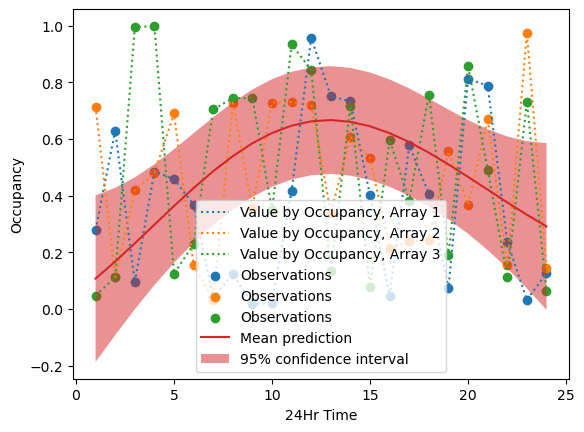

In [387]:
#Testing the trained model with the new set

#Reshaping array for input
X_test_array = np.array(df_test['ValueA'])
X_test_array = X_test_array.reshape(-1, 1)

Y_test_array1 = np.array(df_test['ValueB'])
Y_test_array1 = Y_test_array1.reshape(-1, 1)

Y_test_array2 = np.array(df_test['ValueC'])
Y_test_array2 = Y_test_array2.reshape(-1, 1)

Y_test_array3 = np.array(df_test['ValueD'])
Y_test_array3 = Y_test_array3.reshape(-1, 1)

#Predicting
mean_prediction, std_prediction = gaussian_process.predict(X_test_array, return_std = True)

#Graphing results
plt.plot(X_test_array, temp_col1, label = r"Value by Occupancy, Array 1", linestyle = "dotted")
plt.plot(X_test_array, temp_col2, label = r"Value by Occupancy, Array 2", linestyle = "dotted")
plt.plot(X_test_array, temp_col3, label = r"Value by Occupancy, Array 3", linestyle = "dotted")

plt.scatter(X_test_array, temp_col1, label = "Observations")
plt.scatter(X_test_array, temp_col2, label = "Observations")
plt.scatter(X_test_array, temp_col3, label = "Observations")

plt.plot(X_test_array, mean_prediction, label = "Mean prediction")
plt.fill_between(
    X_test_array.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)

plt.legend()
plt.xlabel("24Hr Time")
plt.ylabel("Occupancy")


In [388]:
mean_prediction

array([0.10740296, 0.16771547, 0.23168606, 0.29753663, 0.36329466,
       0.4268916 , 0.48627196, 0.53950539, 0.5848931 , 0.62106037,
       0.64702816, 0.66225828, 0.66666926, 0.66062248, 0.64488061,
       0.62054291, 0.58896345, 0.5516597 , 0.51021884, 0.46620919,
       0.42110253, 0.37621211, 0.3326488 , 0.29129623])

# Extrapolation to Predict Future Values

In [389]:
import datetime

#today = datetime.datetime.now()
#above code is for future reference on how to access current datetime info

X_test_day = np.linspace(0.5, 23.5, num = 24, dtype = "float").reshape(-1, 1)
mean_y_predict, std_y_predict = gaussian_process.predict(X_test_day, return_std = True)

X_test_day

array([[ 0.5],
       [ 1.5],
       [ 2.5],
       [ 3.5],
       [ 4.5],
       [ 5.5],
       [ 6.5],
       [ 7.5],
       [ 8.5],
       [ 9.5],
       [10.5],
       [11.5],
       [12.5],
       [13.5],
       [14.5],
       [15.5],
       [16.5],
       [17.5],
       [18.5],
       [19.5],
       [20.5],
       [21.5],
       [22.5],
       [23.5]])

Text(0, 0.5, 'Occupancy')

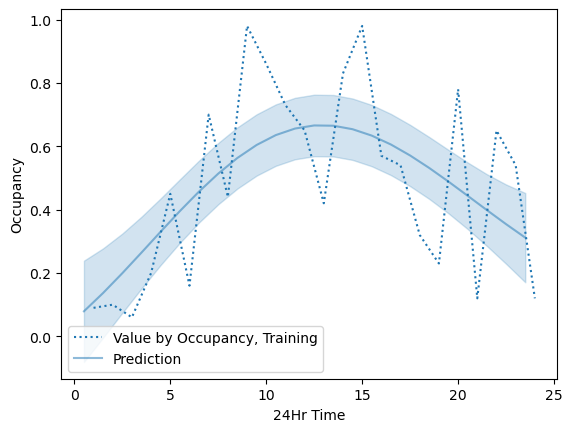

In [390]:
#plotting
plt.plot(X_array, Y_array, label = r"Value by Occupancy, Training", linestyle = "dotted")
plt.plot(X_test_day, mean_y_predict, color = "tab:blue", alpha = 0.5, label = "Prediction")
plt.fill_between(
    X_test_day.ravel(),
    mean_y_predict - std_y_predict,
    mean_y_predict + std_y_predict,
    color = "tab:blue",
    alpha = 0.2,

)

plt.legend()
plt.xlabel("24Hr Time")
plt.ylabel("Occupancy")

In [391]:
#Array of predicted occupancies at each x value, 
#aka each hour based on the set it was trained on

#Predict along every minute of the day in next testing set
#Recurrent neural network - train on one day, predict the next day

mean_y_predict

array([0.07910069, 0.13700077, 0.19934903, 0.26449615, 0.33055549,
       0.39549336, 0.45723373, 0.51376981, 0.56327443, 0.60420042,
       0.63536351, 0.6560012 , 0.66580359, 0.66491417, 0.65390172,
       0.63370654, 0.60556628, 0.57092847, 0.53135697, 0.48844005,
       0.44370658, 0.39855573, 0.35420385, 0.31165012])

:(

# Predicting Values Across 24 Hours, Per 10 Minutes

In [392]:
#Initializing a testing set
#Needs to be in decimals by hour not 0
X_test_minutes = np.linspace(0, 24, num = 144, dtype = "float").reshape(-1, 1)
mean_y_predict, std_y_predict = gaussian_process.predict(X_test_minutes, return_std = True)


Text(0, 0.5, 'Occupancy')

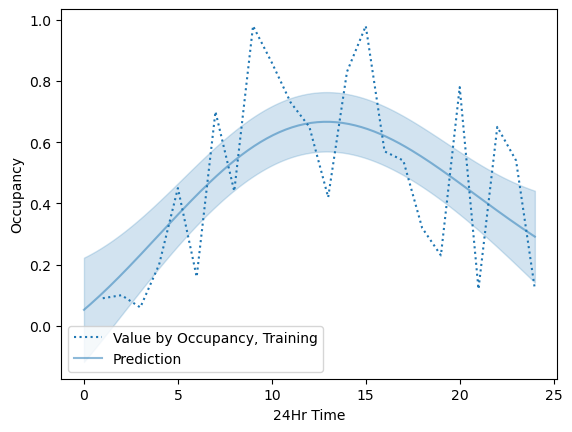

In [393]:
#plotting
plt.plot(X_array, Y_array, label = r"Value by Occupancy, Training", linestyle = "dotted")
plt.plot(X_test_minutes, mean_y_predict, color = "tab:blue", alpha = 0.5, label = "Prediction")
plt.fill_between(
    X_test_minutes.ravel(),
    mean_y_predict - std_y_predict,
    mean_y_predict + std_y_predict,
    color = "tab:blue",
    alpha = 0.2,

)

plt.legend()
plt.xlabel("24Hr Time")
plt.ylabel("Occupancy")

In [394]:
#Based on the probability distribution that the model has produced, these are the mean values of those
#probabilities and so the most likely occupancy at a given 10 minute interval in the model's opinion
mean_y_predict

array([0.05225155, 0.06109299, 0.07010876, 0.07929373, 0.08864251,
       0.09814938, 0.10780838, 0.11761325, 0.12755749, 0.13763432,
       0.1478367 , 0.15815737, 0.1685888 , 0.17912324, 0.18975275,
       0.20046913, 0.21126402, 0.22212884, 0.23305486, 0.24403315,
       0.25505466, 0.26611018, 0.27719035, 0.28828574, 0.29938678,
       0.31048382, 0.32156715, 0.33262696, 0.34365344, 0.35463672,
       0.36556692, 0.37643417, 0.38722858, 0.39794032, 0.4085596 ,
       0.41907668, 0.42948189, 0.43976566, 0.44991851, 0.45993109,
       0.46979419, 0.47949872, 0.48903579, 0.49839664, 0.50757275,
       0.51655577, 0.52533756, 0.53391024, 0.54226614, 0.55039786,
       0.55829826, 0.56596047, 0.5733779 , 0.58054428, 0.5874536 ,
       0.59410021, 0.60047875, 0.60658419, 0.61241185, 0.61795738,
       0.62321677, 0.62818637, 0.63286288, 0.63724337, 0.64132526,
       0.64510634, 0.64858477, 0.65175905, 0.65462808, 0.6571911 ,
       0.65944774, 0.66139797, 0.66304213, 0.66438091, 0.66541

Now why don't we finish the process off?

# **Extracting Predictions From the Model's Output**

---



In [395]:
#Finding the index of the occupancy at a requested time
interval_Index = 0
interval_minutes = 10;

requested_time = 14.17;

#take the time, return the minutes, divide by 60 = minutes in terms of hours
#14:10
#2:00 

#So we want to take a value at a certain 10-minute interval and return it so we've got it to pass
#to the scoring algorithm

#Ex: Let's find the occupancy around 14:00


num_of_intervals = ((24 * 60) / interval_minutes)
occurance_of_interval = int(((requested_time * 60) / interval_minutes))

mean_y_predict[occurance_of_interval]




#I suppose when this is all said and done, the above values would be assigned with a passed on
#value from user input.

0.6573453247964753

In [396]:
test_distance = 0.48
p_val = 0.55
d_val = 0.45
final = (test_distance * d_val) + (p_val * mean_y_predict[occurance_of_interval])

final

0.5775399286380615

# **Testing with Scraper Data**

---



In [397]:
data = pd.read_csv('Time testing.csv')

#Sample code to convert 00:00:00 times into floats

#Makes a dataframe of datetimes
df['Time_cols'] = pd.to_datetime(data['Time'])
df['Time_cols']

#00:00:00

#Isolates the hour and minutes
df['hour'] = df['Time_cols'].dt.hour
df['minutes'] = df['Time_cols'].dt.minute

#Divides minutes by 60 to get its fraction of the hour
df['minutes_decimal'] = (df['minutes'] / 60.0)

#Adds the two frames to return a frame of hours 
#and minutes as floats
df['hours_minutes'] = df['hour'] + df['minutes_decimal']



---



In [398]:
#import data
clean_data = pd.read_csv('clean_data.csv')

clean_data.head()

,Time,PG1,PG2,PG3,PG4,PG5,PG6
0,2:10:21,434,269,1160,628,1255,1616
1,2:30:14,435,265,1160,629,1255,1616
2,2:50:08,436,264,1160,628,1255,1616
3,3:11:00,436,264,1162,628,1255,1619
4,3:30:55,436,264,1162,629,1255,1619




---



---





---



In [399]:
#Splits the time column of the dataframe into hr, min, and secs columns using ":" as a marker.
#fills them in as integers
clean_data[['hr','min','secs']] = clean_data['Time'].str.split(':', expand = True).astype(int)

#Express minutes in terms of hours
clean_data['mins_as_hrs'] = (clean_data['min'].divide(60.0))

#Adds the two frames to return a frame of hours and minutes as a float
clean_data['Final_time'] = clean_data['hr'].add(clean_data['mins_as_hrs'])
clean_data['min'].shape

#Note: Even those these frames are new, they still must be preceeded with clean_data or else
#their shape changes and data is lost. Cannot write df['Final_time'], that dataframe was already
#initialized


(35,)

In [400]:
#ensuring dimension is correct
clean_data['mins_as_hrs'].shape

(35,)

In [401]:
#Initalize training set

#Pass through the final time dataframe, change it to a numpy array and assign it to Time_scraped
Time_scraped = np.array(clean_data['Final_time'])
Time_scraped = Time_scraped.reshape(-1, 1)

Time_scraped

array([[ 2.16666667],
       [ 2.5       ],
       [ 2.83333333],
       [ 3.18333333],
       [ 3.5       ],
       [ 3.83333333],
       [ 4.16666667],
       [ 4.5       ],
       [ 5.56666667],
       [ 6.03333333],
       [ 6.36666667],
       [ 6.68333333],
       [10.11666667],
       [10.41666667],
       [10.76666667],
       [11.35      ],
       [13.13333333],
       [13.68333333],
       [13.93333333],
       [14.18333333],
       [14.43333333],
       [14.68333333],
       [14.95      ],
       [15.08333333],
       [15.2       ],
       [15.45      ],
       [15.7       ],
       [15.95      ],
       [16.2       ],
       [16.46666667],
       [16.71666667],
       [16.96666667],
       [17.36666667],
       [17.61666667],
       [17.86666667]])

In [407]:
#Preparing empty spaces data to fit the y-axis
#Pg1
y_pg1 = np.array(clean_data['PG1'])
y_pg1 = y_pg1.reshape(-1, 1)

#Pg2
y_pg2 = np.array(clean_data['PG2'])
y_pg3 = y_pg2.reshape(-1, 1)

#[Other parking garages here]

#Let's start off with those now before i run into
#478 errors because i cant actually do multiple

#Initialize GPR

#Kernels - the variable names for these will have to be changed to some flavor of kernel_pg[X]
noise_kernel_scrape = C(1.0, (1e-3, 1e3)) * RationalQuadratic(length_scale = 1.0, alpha = 1.0)
kernel_scrape = 1.0**1 * RBF(length_scale = 1.0, length_scale_bounds = (1e-2, 1e2))

#Train the model
final_kernel_scrape = (kernel_scrape + noise_kernel_scrape)

#PG1
gaussian_process = GaussianProcessRegressor(kernel = final_kernel_scrape, alpha = 0.1, n_restarts_optimizer = 10, normalize_y=True)

gaussian_process.fit(Time_scraped, y_pg1)
gaussian_process.kernel_

#pleasepleaspleasepleasepleasepleasepleaseworkpleasepleasepleaseworkplease

0.953**2 * RBF(length_scale=3.65) + 0.0355**2 * RationalQuadratic(alpha=6.62e+03, length_scale=3.65)

Text(0, 0.5, 'Empty Spaces')

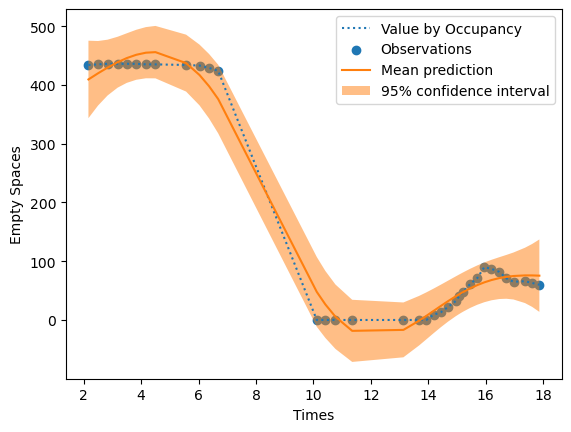

In [408]:
mean_prediction_pg1, std_prediction_pg1 = gaussian_process.predict(Time_scraped, return_std = True)

plt.plot(Time_scraped, y_pg1, label = r"Value by Occupancy", linestyle = "dotted")
plt.scatter(Time_scraped, y_pg1, label = "Observations")
plt.plot(Time_scraped, mean_prediction_pg1, label = "Mean prediction")
plt.fill_between(
    Time_scraped.ravel(),
    mean_prediction_pg1 - 1.96 * std_prediction_pg1,
    mean_prediction_pg1 + 1.96 * std_prediction_pg1,
    alpha=0.5,
    label=r"95% confidence interval",
)

plt.legend()
plt.xlabel("Times")
plt.ylabel("Empty Spaces")


In [404]:
mean_prediction_pg1

array([409.39146964, 419.82664846, 429.56531697, 438.71352768,
       445.708088  , 451.37535624, 454.89554398, 455.84632212,
       437.17744521, 416.95967292, 397.79160768, 376.04690276,
        47.82675172,  26.38507723,   5.54685259, -18.51949557,
       -16.87832514,  -1.09697951,   7.03430782,  15.39877801,
        23.75662943,  31.89139966,  40.11057235,  43.98361172,
        47.22144431,  53.63158723,  59.25336834,  64.03342104,
        67.95149022,  71.19334152,  73.39574048,  74.85432197,
        75.85969357,  75.82099926,  75.40796541])

In [0]:
#Pg 2
